# Linear Regression variants, KNN and Random Forest  tested on Bitcoin Prices 

This segemnt of the project aims at predicting bitcoin prices by establishing relations between contributing factors such as OPEN, HIGH,LOW, VOLUME, RETURNS, MARKET CAPTILIZATION and TRADECOUNT. We initialy attempt to find out the affecting factors via EDA and correlation identification and later on move towards selected variable pre processing to furthre build predictive models such as LINEAR REGRESSION, HUBBER REGRESSION,POLYNOMIAL REGRESSION, ELASTIC NET, KNN REGRESSOR and RANDOM FOREST.  

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns

In [45]:
bitcoin=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/Bitcoin.xlsx',sheet_name="bitcoin")
print(bitcoin.tail())

           Date    Price     Open     High      Low      Vol.  Change %  \
1156 2021-03-02  48424.2  49595.6  50191.9  47100.6  102100.0   -0.0236   
1157 2021-03-03  50395.1  48422.2  52567.9  48159.2   44930.0    0.0407   
1158 2021-03-04  48428.0  50388.0  51757.7  47521.8    9560.0   -0.0390   
1159 2021-03-05  48792.5  48363.6  49429.4  46370.1  113640.0    0.0075   
1160 2021-03-06  48855.6  48798.7  49191.8  47132.8   66660.0    0.0013   

            MktCap  Tradecount  
1156  901933683269     1855583  
1157  942236576905     2242131  
1158  905414104807     2291936  
1159  912285065720     2054216  
1160  912054166029     1476474  


# EDA BITCOIN

Text(0.5, 1.0, 'BITCOIN PRICES')

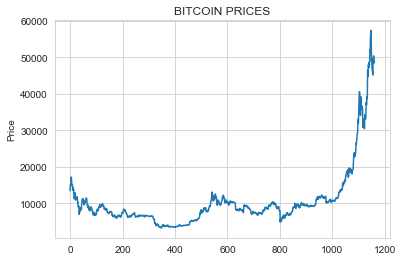

In [46]:
sns.lineplot(data=bitcoin['Price'])
plt.title("BITCOIN PRICES")
# TREMENDOUS RISE IS SEEN

<AxesSubplot:>

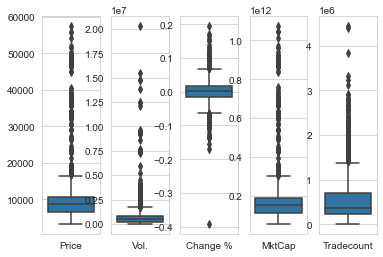

In [47]:
fig, axs = plt.subplots(ncols=5)
sns.set_style("whitegrid")
sns.boxplot(data=bitcoin[['Price']],ax=axs[0])
sns.boxplot(data=bitcoin[['Vol.']],ax=axs[1])
sns.boxplot(data=bitcoin[['Change %']],ax=axs[2])
sns.boxplot(data=bitcoin[['MktCap']],ax=axs[3])
sns.boxplot(data=bitcoin[['Tradecount']],ax=axs[4])
# NOT MUCH USEFUL! PLOT A HEATMAP.

<AxesSubplot:>

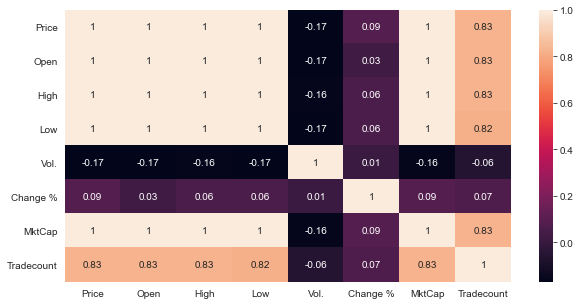

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(bitcoin.corr().round(2), annot=True)

# Clearly, MktCap and Tradecount are highly related to the price and thus will be selected as the variables to develop the model furthre, Rest of the factors are discarded.

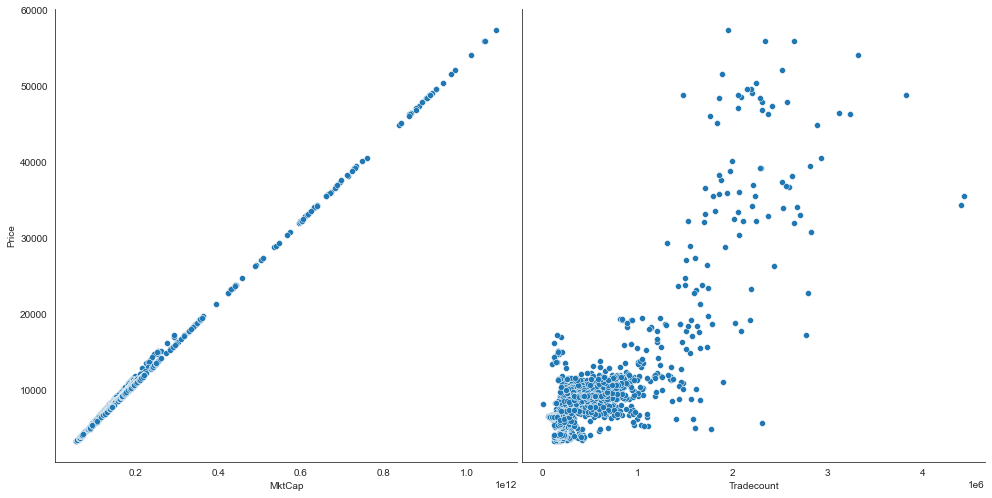

In [49]:
sns.set_style("white")
sns.pairplot(bitcoin,x_vars=['MktCap','Tradecount'],y_vars='Price',height=7,kind='scatter',diag_kind=None)

In [50]:
import scipy as scipy
from scipy.stats.mstats import normaltest
print(normaltest(bitcoin['Price']))
#print(normaltest(bitcoin['MktCap']))
#print(normaltest(bitcoin['Tradecount']))

NormaltestResult(statistic=784.816054799393, pvalue=3.7962870702111035e-171)


# Price is not  normaly distributed as seen by the small p value. This might affect model results.  Perform a Boxcox transformation to mormalize.

In [51]:
from scipy.stats import boxcox

def boxcox_transformation(a):
    boxcox_res=boxcox(a)
    print(boxcox_res)
    boxcox_y=boxcox_res[0] # as it has two outputs one the ransformed array and the lambda used to transform
    return boxcox_y
    
boxcox_bitcoin_price=boxcox_transformation(bitcoin.Price)
#boxcox_bitcoin_mktcap=boxcox_transformation(bitcoin.MktCap)
#boxcox_bitcoin_trade=boxcox_transformation(bitcoin.Tradecount)

print(normaltest(boxcox_bitcoin_price))
#print(normaltest(boxcox_bitcoin_mktcap))
#print(normaltest(boxcox_bitcoin_trade))

(array([2.06229452, 2.06324394, 2.06351113, ..., 2.07229449, 2.07233677,
       2.07234404]), -0.47983109995626166)
NormaltestResult(statistic=10.510803023715031, pvalue=0.005219250280345183)


# Boxcox transformation gives 2 results, one the transformed array other is the lambda used to transform. For eg lambda=-0.4798 for price.

# MODEL BUILDING

# LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

#x1=pd.DataFrame(boxcox_bitcoin_mktcap.reshape(-1,1))
#x2=pd.DataFrame(boxcox_bitcoin_trade.reshape(-1,1))
#x=pd.concat([x1, x2], axis=1)
#x.columns=['mktvalue','tradecount']
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price

lr=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nMean Negative square from CV=10")
print(mean_mse)

Mean Absolute Error: 0.002968878067800035
Mean Squared Error: 1.4940168241996666e-05
Root Mean Squared Error: 0.0038652513814752937
INTERCEPT 2.0503653599091725 

COEFS [2.87327887e-14 1.15974046e-09] 

R_SQUARED 0.6460420618738513 


Mean Negative square from CV=10
-0.00022136435499377831


           0
344  19379.9
345  12934.1
346   7027.1
347  32193.3
348   8405.1
                0
344  12634.678710
345   9282.954424
346   6875.349165
347  34063.815147
348   7520.694995


Text(0.5, 1.0, 'Linear Regression')

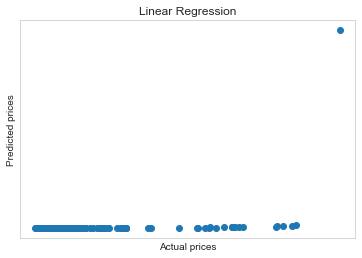

In [29]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.47983109995626166)
price_pred=inv_boxcox(y_pred,-0.47983109995626166)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Linear Regression")

# Linear Regression is giving poor results. 

# HUBBER REGRESSION

In [30]:
#HuberRegressor model;Huber loss is a loss function used in robust regression that is less sensitive to outliers 
#in data than the squared error loss. The Hubber Regressor provided by scikit-learn optimizes the squared loss and
#absolute loss for the samples based on epsilon, where epsilon is a parameter to control the number of samples 
#which should be treated as outliers.

from sklearn.linear_model import HuberRegressor

#x1=pd.DataFrame(boxcox_bitcoin_mktcap.reshape(-1,1))
#x2=pd.DataFrame(boxcox_bitcoin_trade.reshape(-1,1))
#x=pd.concat([x1, x2], axis=1)
#x.columns=['mktvalue','tradecount']
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price

hr=HuberRegressor(alpha=0.001, epsilon=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=hr.fit(x_train,y_train)
y_pred = hr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.9629086028279394
Mean Squared Error: 2.225384872374624
Root Mean Squared Error: 1.4917723929522975
INTERCEPT 1.814262611709563e-18 

COEFS [ 9.77017930e-12 -9.69387549e-14] 

R_SQUARED -57833.79332738932 


Mean Negative square from CV=5
-0.00022136435499377831


           0
344  19379.9
345  12934.1
346   7027.1
347  32193.3
348   8405.1
             0
344        NaN
345        NaN
346   5.798078
347        NaN
348  13.822248


Text(0.5, 1.0, 'Hubber Regression')

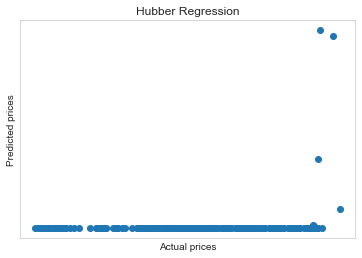

In [31]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.47983109995626166)
price_pred=inv_boxcox(y_pred,-0.47983109995626166)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Hubber Regression")

# Hubber is not a great model!!

# POLYNOMIAL REGRESSION

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#x1=pd.DataFrame(boxcox_bitcoin_mktcap.reshape(-1,1))
#x2=pd.DataFrame(boxcox_bitcoin_trade.reshape(-1,1))
#x=pd.concat([x1, x2], axis=1)
#x.columns=['mktvalue','tradecount']
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price


# TRAINING ERROR PER DEGREE
train_rmse_errors = [] #Saving root mean square for the train set
# TEST ERROR PER DEGREE
test_rmse_errors = [] #Saving root mean square for the test set

for d in range(1,10): #Choose any range you want, the larger the range you test, the more degrees you take into account.
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False) #d is from 1 to 10, we don't want array of 1 as features.
    poly_features = polynomial_converter.fit_transform(x)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred)) #Notice we have y train here
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred)) #Notice we have y test here

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [33]:
train_rmse_errors

[0.0038518493367967694,
 0.002093013763037061,
 0.003877245935803398,
 0.004777059174615282,
 0.005164118330091254,
 0.005379427778595335,
 0.005529620753832378,
 0.005642998597433215,
 0.005729405969839933]

In [34]:
test_rmse_errors

[0.0038652513814752937,
 0.0019641543026394656,
 0.003844117430331792,
 0.00485812694110036,
 0.005268493567740228,
 0.005484022534736668,
 0.005634735235917026,
 0.005755098617249057,
 0.005854088212658746]

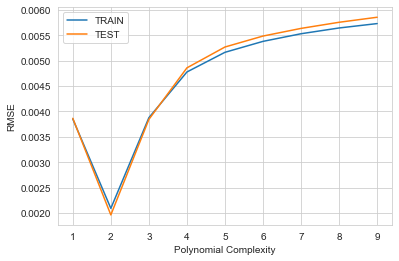

In [35]:
plt.plot(range(1,10),train_rmse_errors[:9],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:9],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

#fitting polynomial degree 2

In [36]:
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False) #d is from 1 to 10, we don't want array of 1 as features.
poly_features = polynomial_converter.fit_transform(x)
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.002968878067800035
Mean Squared Error: 1.4940168241996666e-05
Root Mean Squared Error: 0.0038652513814752937
INTERCEPT 2.0503653599091725 

COEFS [2.87327887e-14 1.15974046e-09] 

R_SQUARED 0.6460420618738513 


Mean Negative square from CV=5
-0.00022136435499377831


           0
344  19379.9
345  12934.1
346   7027.1
347  32193.3
348   8405.1
                0
344  12634.678710
345   9282.954424
346   6875.349165
347  34063.815147
348   7520.694995


Text(0.5, 1.0, ' Polynomial Regression')

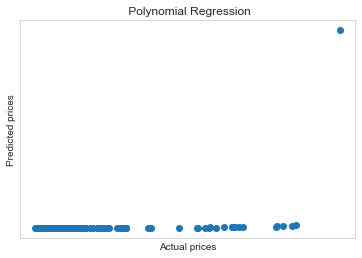

In [37]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.47983109995626166)
price_pred=inv_boxcox(y_pred,-0.47983109995626166)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title(" Polynomial Regression")

# Polynomial is not good.

# ELASTICNET

In [57]:
from sklearn.linear_model import ElasticNetCV

#x1=pd.DataFrame(boxcox_bitcoin_mktcap.reshape(-1,1))
#x2=pd.DataFrame(boxcox_bitcoin_trade.reshape(-1,1))
#x=pd.concat([x1, x2], axis=1)
#x.columns=['mktvalue','tradecount']
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price

lr= ElasticNetCV(l1_ratio=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.002955000128053479
Mean Squared Error: 1.4837361608264537e-05
Root Mean Squared Error: 0.0038519295954449295
INTERCEPT 2.050406345073466 

COEFS [3.2152168e-14 0.0000000e+00] 

R_SQUARED 0.6447065393605194 


Mean Negative square from CV=5
-0.00022210699491603234


           0
344  19379.9
345  12934.1
346   7027.1
347  32193.3
348   8405.1
                0
344  13015.721240
345   9319.587061
346   7012.888439
347  31552.715463
348   7534.036677


Text(0.5, 1.0, 'ElasticNet Regression')

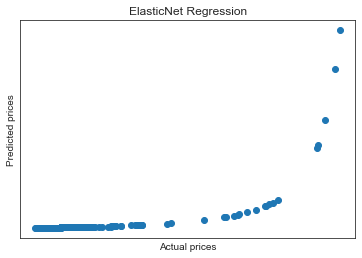

In [58]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.47983109995626166)
price_pred=inv_boxcox(y_pred,-0.47983109995626166)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("ElasticNet Regression")

# Elastic net is not a good model!!

# KNN REGRESOR

In [59]:
# Grid Search for Parameter Tuning 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV


#x1=pd.DataFrame(boxcox_bitcoin_mktcap.reshape(-1,1))
#x2=pd.DataFrame(boxcox_bitcoin_trade.reshape(-1,1))
#x=pd.concat([x1, x2], axis=1)
#x.columns=['mktvalue','tradecount']
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model = KNeighborsRegressor(n_neighbors=10)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
knn = model.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.00026632026653827735
Mean Squared Error: 1.2584298430377504e-07
Root Mean Squared Error: 0.00035474354723345574
R_SQUARED 0.9975871847498788 


Mean Negative square from CV=5
-7.196986444231589e-06


           0
344  19379.9
345  12934.1
346   7027.1
347  32193.3
348   8405.1
                0
344  18805.334124
345  13254.980739
346   6923.300180
347  32257.295432
348   8630.698960


Text(0.5, 1.0, 'KNN Regression')

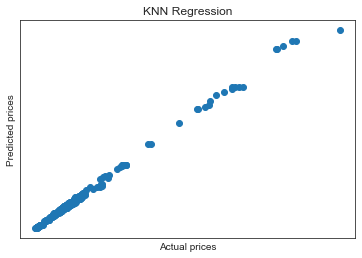

In [60]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.47983109995626166)
price_pred=inv_boxcox(y_pred,-0.47983109995626166)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("KNN Regression")

# KNN is performing good !! 

In [ ]:
import random
n = random.randint(0,22)
print(n)

# RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestRegressor

#x1=pd.DataFrame(boxcox_bitcoin_mktcap.reshape(-1,1))
#x2=pd.DataFrame(boxcox_bitcoin_trade.reshape(-1,1))
#x=pd.concat([x1, x2], axis=1)
#x.columns=['mktvalue','tradecount']
x=bitcoin[['MktCap','Tradecount']]
y=boxcox_bitcoin_price

# Model for best neighbour
model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
rf = model.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.00019192858961150153
Mean Squared Error: 7.601173596968079e-08
Root Mean Squared Error: 0.0002757022596383294
R_SQUARED 0.9992683298901676 


Mean Negative square from CV=5
-7.196986444231589e-06


           0
344  19379.9
345  12934.1
346   7027.1
347  32193.3
348   8405.1
                0
344  19132.031657
345  13067.724674
346   7020.979558
347  32307.905953
348   8499.006497


Text(0.5, 1.0, 'RandomForest Regression')

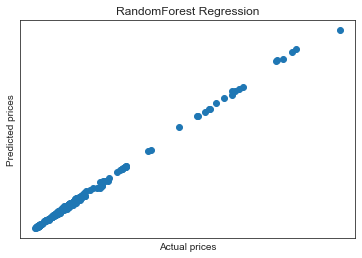

In [62]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.47983109995626166)
price_pred=inv_boxcox(y_pred,-0.47983109995626166)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("RandomForest Regression")

#  Random Forest is also giving great results. R squared standing at 0.99.

# OBSERVATIONS 